In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
import cv2
import random

In [2]:
ripe = pd.read_csv('ripe.csv')
unripe = pd.read_csv('unripe.csv')
unripe = unripe.iloc[104-88:]

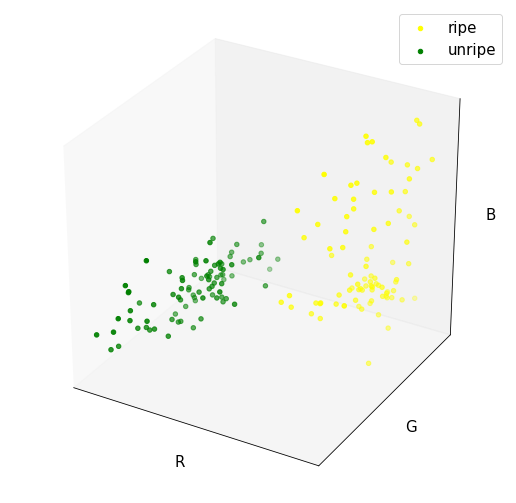

In [3]:
fig = plt.figure(figsize=[9,9])
ax = plt.axes(projection='3d')
ax.scatter3D(ripe['R'], ripe['G'], ripe['B'], color='yellow', label='ripe')
ax.scatter3D(unripe['R'], unripe['G'], unripe['B'], color='green', label='unripe')
plt.xticks([])
plt.yticks([])
ax.set_zticks([])
ax.set_xlabel('R', fontsize=15)
ax.set_ylabel('G', fontsize=15)
ax.set_zlabel('B', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [4]:
random.seed(301)

def g(a):
    return 1 / (1 + np.exp(-a))

def features(x1,x2,x3,x4,x5,x6):    
    vals = np.zeros(len(x1))
    vals[vals==0] = 1

    vals1 = np.zeros(len(x4))
    vals1[vals1==0] = 1

    X1 = list(zip(vals,x1, x2, x3))
    X2 = list(zip(vals,x4, x5, x6))
    X = X1 + X2
    X = np.array(X)
    X = X.astype(float)

    D1 = np.zeros(len(X1)) # 0 for unripe dapat
    D1[D1==0] = 0
    D2 = np.zeros(len(X2)) # 1 for ripe dapat
    D2[D2==0] = 1
    D = np.append(D1,D2)

    return X,D

def perceptron(X,D):
    w = np.zeros(4)
    w[0],w[1],w[2], w[3] = random.random(), random.random(),random.random(), random.random()

    eta = random.random()

    time = 100 #can be longer
    for t in range(time):
        for i,x in enumerate(X):
            a = np.dot(x.T,w)
            z = g(a)
            delta_w = eta*(D[i] - z)*x
            w += delta_w
    return w

def test_perceptron(image, w):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    threshold = 130
    mask = gray.copy()
    mask[mask < threshold] = 1
    mask[mask >= threshold] = 0
    
    image = plt.imread(image)
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    
    image_masked = image.copy()
    image_masked[:,:,0] = image_R * mask
    image_masked[:,:,1] = image_G * mask
    image_masked[:,:,2] = image_B * mask
    
    R = list(filter(lambda a: a != 0, (image_R * mask).flatten()))
    G = list(filter(lambda a: a != 0, (image_G * mask).flatten()))
    B = list(filter(lambda a: a != 0, (image_B * mask).flatten()))
    
    R = list(filter(lambda a: a < 170, R))
    G = list(filter(lambda a: a < 170, G))
    B = list(filter(lambda a: a < 170, B))
    
    R_mean = np.mean(R) / 255
    G_mean = np.mean(G) / 255
    B_mean = np.mean(B) / 255
    
    x = np.array([1, R_mean, G_mean, B_mean])
    a = np.dot(x.T, w)
    z = g(a)
    
    return z

## Training the perceptron

In [5]:
X,D = features(unripe['R'],unripe['G'],unripe['B'], ripe['R'], ripe['G'], ripe['B'])
w = perceptron(X,D)

## Testing the Perceptron

In [6]:
image = 'bananas/Green/g014.jpg'
test_perceptron(image,w)

0.025900883292923515

In [7]:
image = 'bananas/Midripen/m020.jpg'
test_perceptron(image,w)

0.9785227201858946

In [8]:
image = 'bananas/Yellowish_Green/y034.jpg'
test_perceptron(image,w)

0.6024614421920401

In [9]:
image = 'bananas/Yellowish_Green/y028.jpg'
test_perceptron(image,w)

0.6602225269871023